In [64]:
import cv2 # computer vision library   
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

from simple_convnet import SimpleConvNet 
from common.trainer import Trainer


(75, 32, 3)
yellow


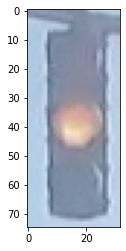

In [65]:
#<<이미지 파일 경로에서 불러오기>>

IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

# Using the load_dataset function in helpers.py
# Load training datas
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)


selected_image = IMAGE_LIST[723][0]
plt.imshow(selected_image)
print(selected_image.shape)
print(IMAGE_LIST[723][1])

In [66]:
#<<레이블 0,1 형식으로 바꾸기>>
def one_hot_encode(label):
    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [] 
    if label =="red":
        one_hot_encoded = [1, 0, 0]
    elif label =="yellow":
        one_hot_encoded = [0, 1, 0]
    else:
        one_hot_encoded = [0, 0, 1]
        
    return one_hot_encoded

In [67]:
#<<이미지 32*32로 만들기>>
def standardize_input(image):
    #Rersize it 
    standard_im = np.copy(image)
    standard_im = cv2.resize(image, (32, 32))
    return standard_im
    

(32, 32, 3)
yellow


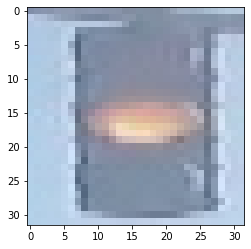

In [68]:
#<<인풋 이미지 출력 해보기>>
selected_image = standardize_input(IMAGE_LIST[723][0])
plt.imshow(selected_image)
print(selected_image.shape)
print(IMAGE_LIST[723][1])

In [69]:
#<<인풋사진이랑 레이블 내가 원하는 형식으로 정리하기.>>

#이미지 access 할려면 x_t_list[0][n] , x_image_np 모양은(n,3,32,32)
#그릴려면 plt.imshow(x_t_list[0][n].T) 하기
#레이블 access 할려면 x_t_list[1][n]

def format(image_list):

    x_t_list = list()

    x_image =[]
    t_label=[]

    for i in range(len(image_list)):
        image = np.array(standardize_input(image_list[i][0]))
        image = np.transpose(image, (2, 1, 0))
        x_image.append(image)

        label = np.array(one_hot_encode(image_list[i][1]))
        t_label.append(label)

    x_image_np= np.array(x_image)
    t_label_np = np.array(t_label)
    
    x_t_list = [x_image_np,t_label_np]
    return x_t_list



FORMATTED_Training_Data = format(IMAGE_LIST)
FORMATTED_Test_Data = format(TEST_IMAGE_LIST)

[0 1 0]
(3, 32, 32)


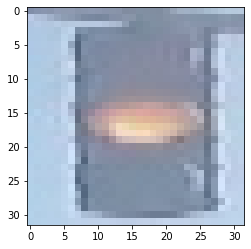

In [70]:
#(n,3,32,32로 잘 포맷 됐나 확인하는 코드)
n=723
print(FORMATTED_Training_Data[1][n])
plt.imshow(FORMATTED_Training_Data[0][n].T)
print(FORMATTED_Training_Data[0][n].shape)


train loss:1.0376772376415149
=== epoch:1, train acc:1.0, test acc:1.0 ===
train loss:0.7936205417282635
train loss:0.8939195884539016
train loss:0.7979527464631431
train loss:0.7897049689743965
train loss:0.6934428002644601
train loss:0.7765970049465561
train loss:0.5072910222611382
train loss:0.7701782411606577
train loss:0.7560181264745601
train loss:0.7145106787997745
train loss:0.6190529835316934
train loss:0.4935621627427127
train loss:0.44870121279481073
train loss:0.3739966392162301
train loss:0.29714938568120064
train loss:0.18866987106651947
train loss:0.1436696105190762
train loss:0.38292670914274735
train loss:0.37352464093336235
train loss:0.32598572892167105
train loss:0.20703914273659818
train loss:0.1252284794633375
train loss:0.2257562230760085
train loss:0.2704068725047819
train loss:0.14257164889440813
train loss:0.23690725131308454
train loss:0.3060396408534507
train loss:0.05874467819083337
train loss:0.2075113794547605
train loss:0.17419838540996532
train loss:0.1

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

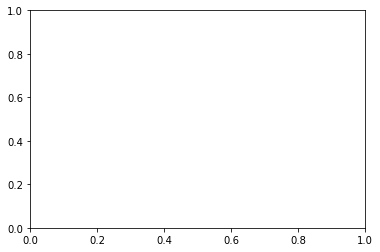

In [82]:
x_train = FORMATTED_Training_Data[0]
t_train = FORMATTED_Training_Data[1]
x_test = FORMATTED_Test_Data[0]
t_test = FORMATTED_Test_Data[1]

max_epochs = 20

network = SimpleConvNet(input_dim=(3,32,32), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=3, weight_init_std=0.001)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=100)
trainer.train()



network.save_params("params.pkl")
print("Saved Network Parameters!")
print("accuracy list: ",trainer.train_acc_list)

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
